In [1]:
import matplotlib.pyplot as plt
import sys
from os.path import dirname
sys.path.append(dirname('./synthcity/src/'))

In [2]:
from synthcity.plugins import Plugins
from synthcity.benchmark import Benchmarks
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader
from sklearn.preprocessing import MinMaxScaler
from synthcity.utils.datasets.time_series.sine import SineDataloader

In [3]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

In [4]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [52]:
from metrics import compute_predictive_score, compute_discriminative_score

In [5]:
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig

In [6]:
from gretel_synthetics.timeseries_dgan.config import DfStyle

In [7]:
static, temporal, observation_times, outcome = SineDataloader().load()

In [8]:
data = TimeSeriesDataLoader(
    temporal_data=temporal,
    observation_times=observation_times,
    static_data=static,
    outcome = outcome,
)

Unique Temporal Data
finding max len
Checking Outcome
Pack raw data
Running initializer


In [54]:
model = DGAN(DGANConfig(
    max_sequence_len=10,
    sample_len=10,
    batch_size=32,
    apply_feature_scaling=True,
    apply_example_scaling=False,
    use_attribute_discriminator=False,
    generator_learning_rate=1e-4,
    discriminator_learning_rate=1e-4,
    epochs=1000,
))

In [55]:
model.train_dataframe(
    data.dataframe(),
    attribute_columns=["seq_out_0", "seq_static_0", "seq_static_1","seq_static_2", "seq_static_3"],
    feature_columns=["seq_temporal_0", "seq_temporal_1", "seq_temporal_2", "seq_temporal_3", "seq_temporal_4"],
    time_column = "seq_time_id",
    example_id_column = "seq_id",
    df_style = DfStyle.LONG
)

In [56]:
data.dataframe()

,seq_id,seq_time_id,seq_static_0,seq_static_1,seq_static_2,seq_static_3,seq_temporal_0,seq_temporal_1,seq_temporal_2,seq_temporal_3,seq_temporal_4,seq_out_0
0,0,0,0.328012,0.724459,0.015719,0.184560,-0.809095,0.905386,-0.387500,0.998140,-0.580147,0
1,0,1,0.328012,0.724459,0.015719,0.184560,-0.671653,0.982948,0.254270,0.882084,-0.766163,0
2,0,2,0.328012,0.724459,0.015719,0.184560,-0.505762,0.690674,0.790793,0.504445,-0.903038,0
3,0,3,0.328012,0.724459,0.015719,0.184560,-0.318448,0.138533,0.999993,-0.022788,-0.981992,0
4,0,4,0.328012,0.724459,0.015719,0.184560,-0.117646,-0.465732,0.795278,-0.543263,-0.997961,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,5,0.643221,0.152480,0.005006,0.542055,0.256473,0.944414,0.580432,0.993159,0.928415,1
996,99,6,0.643221,0.152480,0.005006,0.542055,-0.174604,0.860482,-0.125950,0.970570,0.631674,1
997,99,7,0.643221,0.152480,0.005006,0.542055,-0.573178,0.742384,-0.765508,0.823377,0.176370,1
998,99,8,0.643221,0.152480,0.005006,0.542055,-0.865052,0.594810,-0.998915,0.570478,-0.323206,1


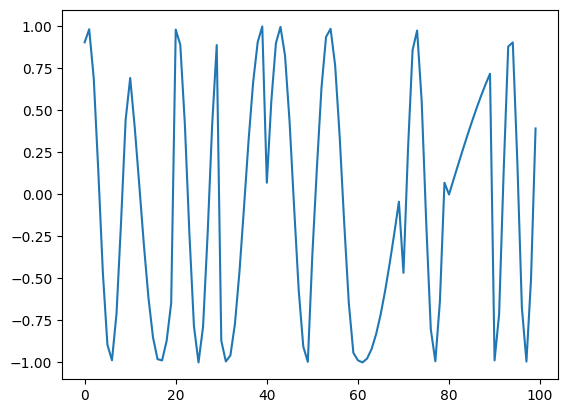

In [57]:
plt.plot(data.dataframe()['seq_temporal_1'][:100])

In [58]:
synthetic_df_dopple = model.generate_dataframe(int(len(data.dataframe())/10))

In [59]:
synthetic_df_dopple

,seq_id,seq_time_id,seq_static_0,seq_static_1,seq_static_2,seq_static_3,seq_temporal_0,seq_temporal_1,seq_temporal_2,seq_temporal_3,seq_temporal_4,seq_out_0
0,0,0,0.889031,0.080682,0.003960,0.016970,0.105967,0.046844,-0.197707,0.112685,-0.038796,0.005465
1,0,1,0.889031,0.080682,0.003960,0.016970,0.305061,0.112940,0.112457,0.453172,0.438644,0.005465
2,0,2,0.889031,0.080682,0.003960,0.016970,0.502804,0.012427,0.541355,0.250162,0.691096,0.005465
3,0,3,0.889031,0.080682,0.003960,0.016970,0.757327,0.407687,-0.001947,0.218834,0.686598,0.005465
4,0,4,0.889031,0.080682,0.003960,0.016970,0.242847,-0.030837,0.196514,-0.100043,0.436714,0.005465
...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,5,0.001837,0.999302,0.994035,0.998229,0.255090,-0.144709,0.173539,0.541639,0.317090,0.996911
996,99,6,0.001837,0.999302,0.994035,0.998229,0.057498,-0.230526,-0.520785,0.759374,0.053547,0.996911
997,99,7,0.001837,0.999302,0.994035,0.998229,-0.067334,-0.505401,-0.464326,0.643757,0.202411,0.996911
998,99,8,0.001837,0.999302,0.994035,0.998229,-0.072504,-0.478356,-0.516297,0.232025,0.641792,0.996911


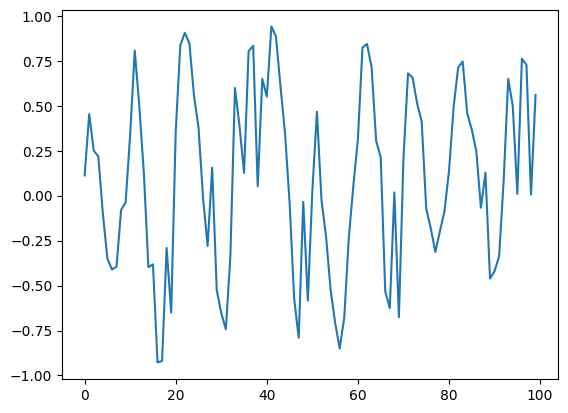

In [60]:
plt.plot(synthetic_df_dopple['seq_temporal_3'][:100])

In [61]:
generated_data = synthetic_df_dopple.to_numpy()
ori_data = data.dataframe().to_numpy()

In [68]:
seq_len = 10
ori_data_cleaned = []
generated_data_cleaned = []

In [69]:
for i in range(0, len(ori_data), seq_len):
    ori_data_cleaned.append(ori_data[i:i+seq_len])
for i in range(0, len(generated_data), seq_len):
    generated_data_cleaned.append(generated_data[i:i+seq_len])

In [72]:
ori_data_cleaned = torch.tensor(ori_data_cleaned)
generated_data_cleaned = torch.tensor(generated_data_cleaned)

In [73]:
iterations = 100
disc_scores = []
pred_scores = []
for i in range(iterations):
    disc_scores.append(compute_discriminative_score(ori_data_cleaned, generated_data_cleaned))
    pred_scores.append(compute_predictive_score(ori_data_cleaned, generated_data_cleaned))

In [74]:
print(np.mean(disc_scores))
print(np.mean(pred_scores))

0.6166700005531311
243.54338485717773
